### Credit Card Approval Prediction Model

#### Importing the necessary packages

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
from imblearn.over_sampling import RandomOverSampler



#### Loading the dataset

In [193]:
df = pd.read_excel("data.xlsx")

Dimensions of the dataset

In [194]:
df.shape

(30, 5)

In [195]:
df.head()

,Location,cust_age,Avg_order_value,Credit score,credit_defaulter
0,City,17.0,200.0,450,yes
1,Rural,20.0,300.0,700,no
2,Rural,30.0,654.0,750,no
3,City,26.0,453.0,564,no
4,City,60.0,33.0,600,no


#### Summary of the Data

In [196]:
df.describe()

,cust_age,Avg_order_value,Credit score
count,29.000000,29.000000,30.000000
mean,43.068966,593.965517,667.433333
std,42.059423,501.194536,108.148583
min,17.000000,23.000000,370.000000
25%,24.000000,234.000000,602.750000
50%,32.000000,456.000000,675.500000
75%,45.000000,767.000000,753.000000
max,245.000000,2000.000000,843.000000


In [197]:
df.dtypes

Location             object
cust_age            float64
Avg_order_value     float64
Credit score          int64
credit_defaulter     object
dtype: object

So we have a data which has 30 rows and 5 columns, in which 4 columns are the predictors and the "credit_defaulter" is the target variable.

### Data Cleaning

In [198]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

Replacing the column names with the good coding conventions by replace the white space with _

In [199]:
df.isna().sum()

location            0
cust_age            1
avg_order_value     1
credit_score        0
credit_defaulter    0
dtype: int64

We have one missing value in 2 columns in the dataset. Since there are very less missing values we can either remove those columns but also we can impute those with a mean or median.


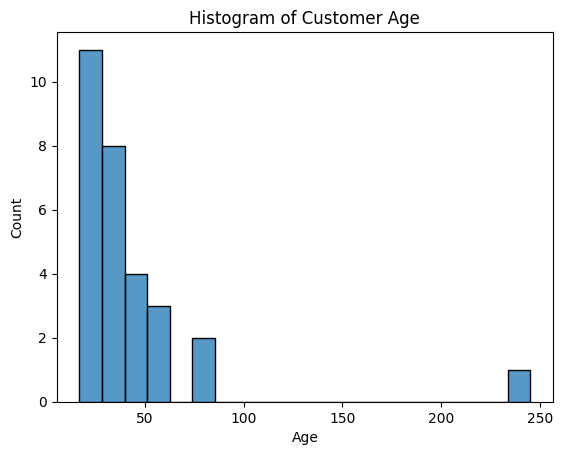

In [200]:
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Customer Age')
sns.histplot(df['cust_age'], bins=20)  
plt.show()

Since the human age can be within 1-120, having a value above 200 is an error that should be corrected. Since the age is skewed replacing with the median value would be the better option as it is not impacted by the extreme values.

In [201]:
df['cust_age'].loc[df['cust_age']>200] = df['cust_age'].median()

C:\Users\santh\AppData\Local\Temp\ipykernel_3744\2872431573.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['cust_age'].loc[df['cust_age']>200] = df['cust_age'].median()
C:\Users\santh\AppData\Local\Temp\ipykernel_3744\2872431573.py:1

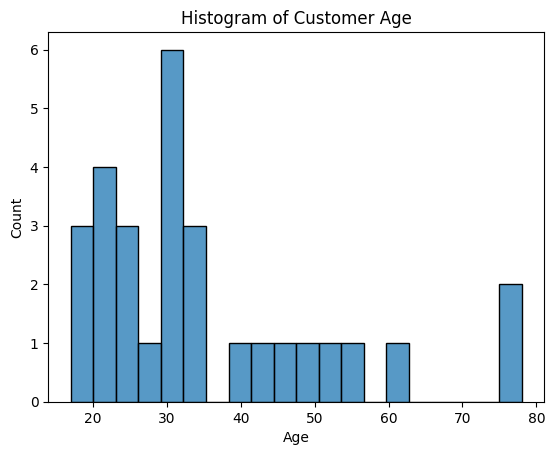

In [202]:
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Customer Age')
sns.histplot(df['cust_age'], bins=20)
plt.show()

Also we can replace the missing value with the median value as the column is skewed to the right.

In [203]:
df['cust_age'].fillna(df['cust_age'].median(), inplace=True)

C:\Users\santh\AppData\Local\Temp\ipykernel_3744\989026022.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cust_age'].fillna(df['cust_age'].median(), inplace=True)


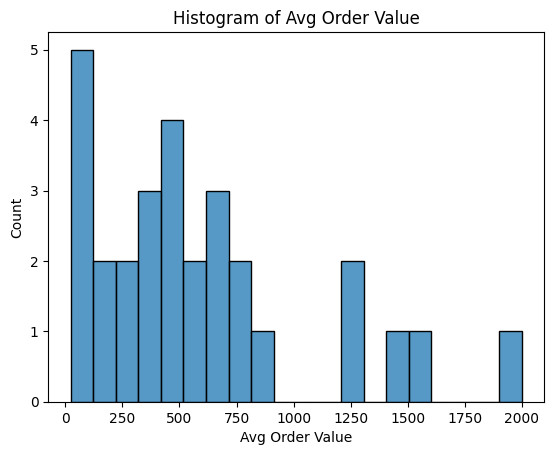

In [204]:
plt.xlabel('Avg Order Value')
plt.ylabel('Count')
plt.title('Histogram of Avg Order Value')
sns.histplot(df['avg_order_value'], bins=20) 
plt.show()

In [205]:
df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)

C:\Users\santh\AppData\Local\Temp\ipykernel_3744\2218021865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)


In [206]:
df.isna().sum()

location            0
cust_age            0
avg_order_value     0
credit_score        0
credit_defaulter    0
dtype: int64

All the missing values have been treated by replacing with the median of that features based on observing the distribution of the dataset.

In [207]:
print("Maximum value of the credit score is",df['credit_score'].max()," and the minimum value is ",df['credit_score'].min())

Maximum value of the credit score is 843  and the minimum value is  370


All the values of the credit_score data is within the correct limit

### EDA

### Comparing the defaulters based on the location

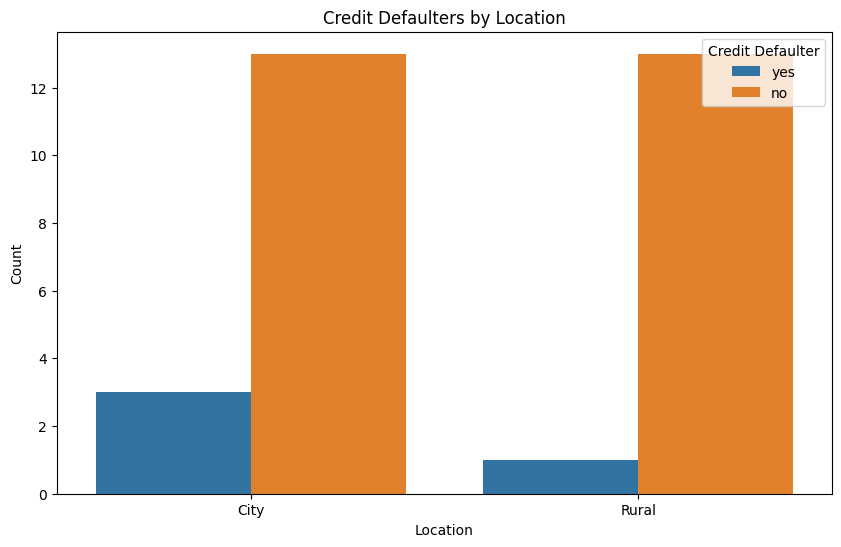

In [208]:

location_credit_defaulter_counts = df.groupby('location')['credit_defaulter'].sum()
plt.figure(figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Credit Defaulters by Location')
sns.countplot(data=df, x='location', hue='credit_defaulter')
plt.legend(title='Credit Defaulter', loc='upper right')
plt.show()

### Comparing the defaulters based on the credit score

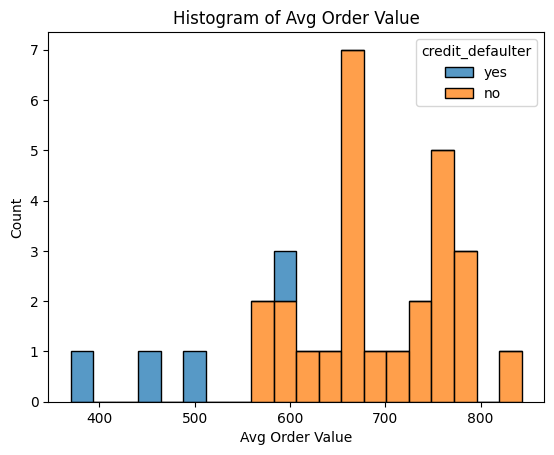

In [209]:
plt.xlabel('Avg Order Value')
plt.ylabel('Count')
plt.title('Histogram of Avg Order Value')
sns.histplot(data = df, x='credit_score',hue='credit_defaulter', multiple='stack', bins=20)  
plt.show()

Mostly the credit defaulters are below 600 and this can be huge factor in deciding whether to give credit card or not. 

#### Correlation of the dataset helps us to understand better about the relationship between the input features

In [211]:
df[['cust_age', 'avg_order_value', 'credit_score']].corr()

,cust_age,avg_order_value,credit_score
cust_age,1.000000,0.137892,0.067784
avg_order_value,0.137892,1.000000,-0.078803
credit_score,0.067784,-0.078803,1.000000


In [212]:
df['credit_defaulter'].value_counts()

credit_defaulter
no     26
yes     4
Name: count, dtype: int64

The data is imbalanced, as we can see the non defaulters are 26 and defaulters are just 4.

### Modeling

We can use any classification algorithm for this task but **Random Forest model** is simple and efficient to handle a imbalanced data compared to other classification model with this computational efficiency.

In [213]:
df = pd.get_dummies(df, columns=['location'])
X = df[['location_City','location_Rural', 'cust_age', 'avg_order_value', 'credit_score']]
y = df['credit_defaulter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
# random forest with parameters n_estimator = 100
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model
rf_classifier.fit(X_train, y_train)

# predict the class
y_pred = rf_classifier.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate f1 score
f1 = f1_score(y_test, y_pred, pos_label='no')
print("F1 Score:", f1)

Accuracy: 0.6666666666666666
F1 Score: 0.8


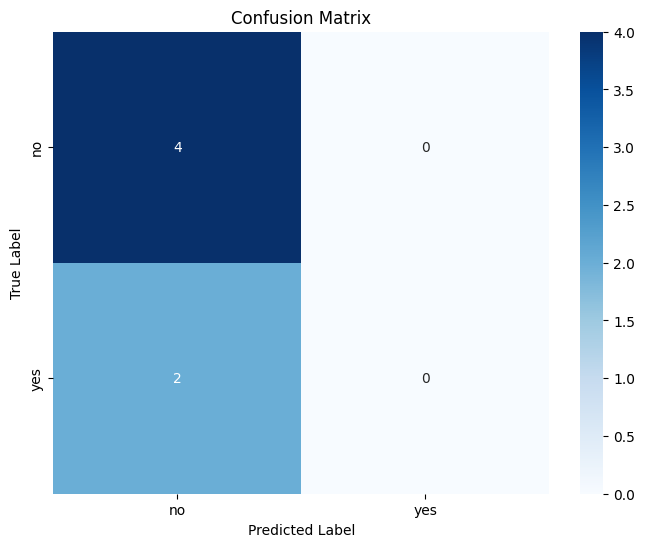

In [216]:


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['no','yes']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We can clearly see that the model did not predict the minority class and it was biased towards the majority class, this problem can be resolved by using the sampling methods like

* Over Sampling of the minority class
* Under Sampling of the majority class
* SMOTE - Synthetic minority oversampling methods


For this case we can use the oversampling of the minority since we are dealing with a small dataset of 30 rows.

### Over Sampling 

We are over sampling the minority class

In [217]:
# perform oversampling
oversampler = RandomOverSampler(random_state=34)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [226]:
y_resampled.value_counts()

credit_defaulter
yes    26
no     26
Name: count, dtype: int64

We can see that both classes have equal number of training data, when we train a model with this data. The model will  not be biased to any class and will perform with more accuracy and improvement in the F1 score.

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=32)

In [223]:
# random forest with parameters n_estimator = 100
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=34)

# fit the model
rf_classifier.fit(X_train, y_train)

# predict the class
y_pred = rf_classifier.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate f1 score
f1 = f1_score(y_test, y_pred, pos_label='no')
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


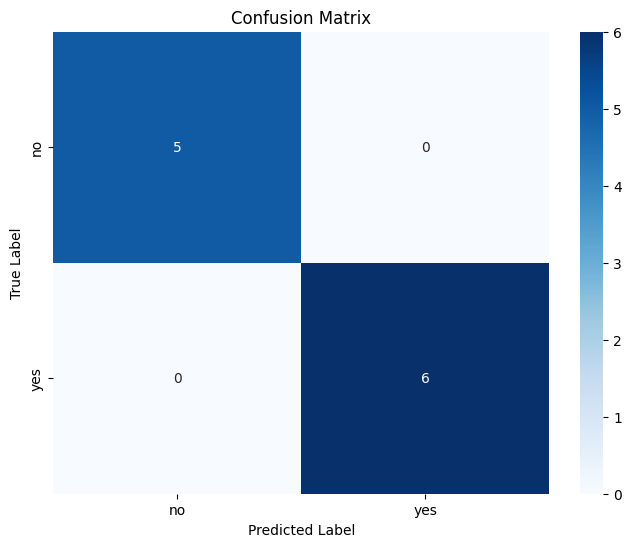

In [225]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
class_labels = ['no','yes']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We can see that increase in the evaluation metrics from 66% to 100%, by using the oversampling of the minority class. This model can be used to classify whether to approve a credit card for a user or not. 